In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from plotly.subplots import make_subplots

import missingno as msno

pd.set_option('display.max_columns', 60)

In [3]:
columns = [
    "timestamp", "activityID", "heart_rate",

    "hand_temp",
    "hand_acc_x16", "hand_acc_y16", "hand_acc_z16",
    "hand_acc_x6",  "hand_acc_y6",  "hand_acc_z6",
    "hand_gyro_x",  "hand_gyro_y",  "hand_gyro_z",
    "hand_mag_x",   "hand_mag_y",   "hand_mag_z",
    "hand_orient_w", "hand_orient_x", "hand_orient_y", "hand_orient_z",

    "chest_temp",
    "chest_acc_x16", "chest_acc_y16", "chest_acc_z16",
    "chest_acc_x6",  "chest_acc_y6",  "chest_acc_z6",
    "chest_gyro_x",  "chest_gyro_y",  "chest_gyro_z",
    "chest_mag_x",   "chest_mag_y",   "chest_mag_z",
    "chest_orient_w", "chest_orient_x", "chest_orient_y", "chest_orient_z",

    "ankle_temp",
    "ankle_acc_x16", "ankle_acc_y16", "ankle_acc_z16",
    "ankle_acc_x6",  "ankle_acc_y6",  "ankle_acc_z6",
    "ankle_gyro_x",  "ankle_gyro_y",  "ankle_gyro_z",
    "ankle_mag_x",   "ankle_mag_y",   "ankle_mag_z",
    "ankle_orient_w", "ankle_orient_x", "ankle_orient_y", "ankle_orient_z",
]

In [4]:
import os
def load_data(path):
  dfs = {}
  optional_path = os.path.join(path, 'optional')
  for file in os.listdir(optional_path):
    df = pd.read_csv(os.path.join(optional_path, file), header=None, names=columns, sep=' ')
    df.insert(0, 'subject', file.split('.')[0])
    dfs[file.split('.')[0]] = df

  protocol_path = os.path.join(path, 'protocol')
  for file in os.listdir(protocol_path):
    df = pd.read_csv(os.path.join(protocol_path, file), header=None, names=columns, sep=' ')
    df.insert(0, 'subject', file.split('.')[0])
    subj = file.split('.')[0]

    if subj in dfs:
      dfs[subj] = pd.concat([dfs[subj], df], ignore_index=True)
    else:
      dfs[subj] = df

  return list(dfs.values())

In [5]:
dfs = load_data('/content/drive/MyDrive/Colab Notebooks/Personal/human_activity_segmentation_project/data')

In [6]:
for df in dfs:
  print(f"the shape of {df['subject'][0]} data set: {df.shape}")

the shape of subject101 data set: (695769, 55)
the shape of subject105 data set: (529556, 55)
the shape of subject106 data set: (491780, 55)
the shape of subject108 data set: (588443, 55)
the shape of subject109 data set: (201949, 55)
the shape of subject102 data set: (447000, 55)
the shape of subject103 data set: (252833, 55)
the shape of subject104 data set: (329576, 55)
the shape of subject107 data set: (313599, 55)


In [7]:
for df in dfs:
  print(f"the unique activites of {df['subject'][0]}: {df['activityID'].sort_values().unique()}")

the unique activites of subject101: [ 0  1  2  3  4  5  6  7  9 11 12 13 16 17 18 19 24]
the unique activites of subject105: [ 0  1  2  3  4  5  6  7 10 12 13 16 17 19 24]
the unique activites of subject106: [ 0  1  2  3  4  5  6  7 10 12 13 16 17 18 19 24]
the unique activites of subject108: [ 0  1  2  3  4  5  6  7 10 12 13 16 17 18 19 20 24]
the unique activites of subject109: [ 0 10 18 19 20 24]
the unique activites of subject102: [ 0  1  2  3  4  5  6  7 12 13 16 17 24]
the unique activites of subject103: [ 0  1  2  3  4 12 13 16 17]
the unique activites of subject104: [ 0  1  2  3  4  5  6  7 12 13 16 17]
the unique activites of subject107: [ 0  1  2  3  4  5  6  7 12 13 16 17]


In [8]:
data = pd.concat(dfs, ignore_index=True)

In [9]:
data.shape

(3850505, 55)

In [10]:
data['subject'].unique()

array(['subject101', 'subject105', 'subject106', 'subject108',
       'subject109', 'subject102', 'subject103', 'subject104',
       'subject107'], dtype=object)

<Figure size 1000x600 with 0 Axes>

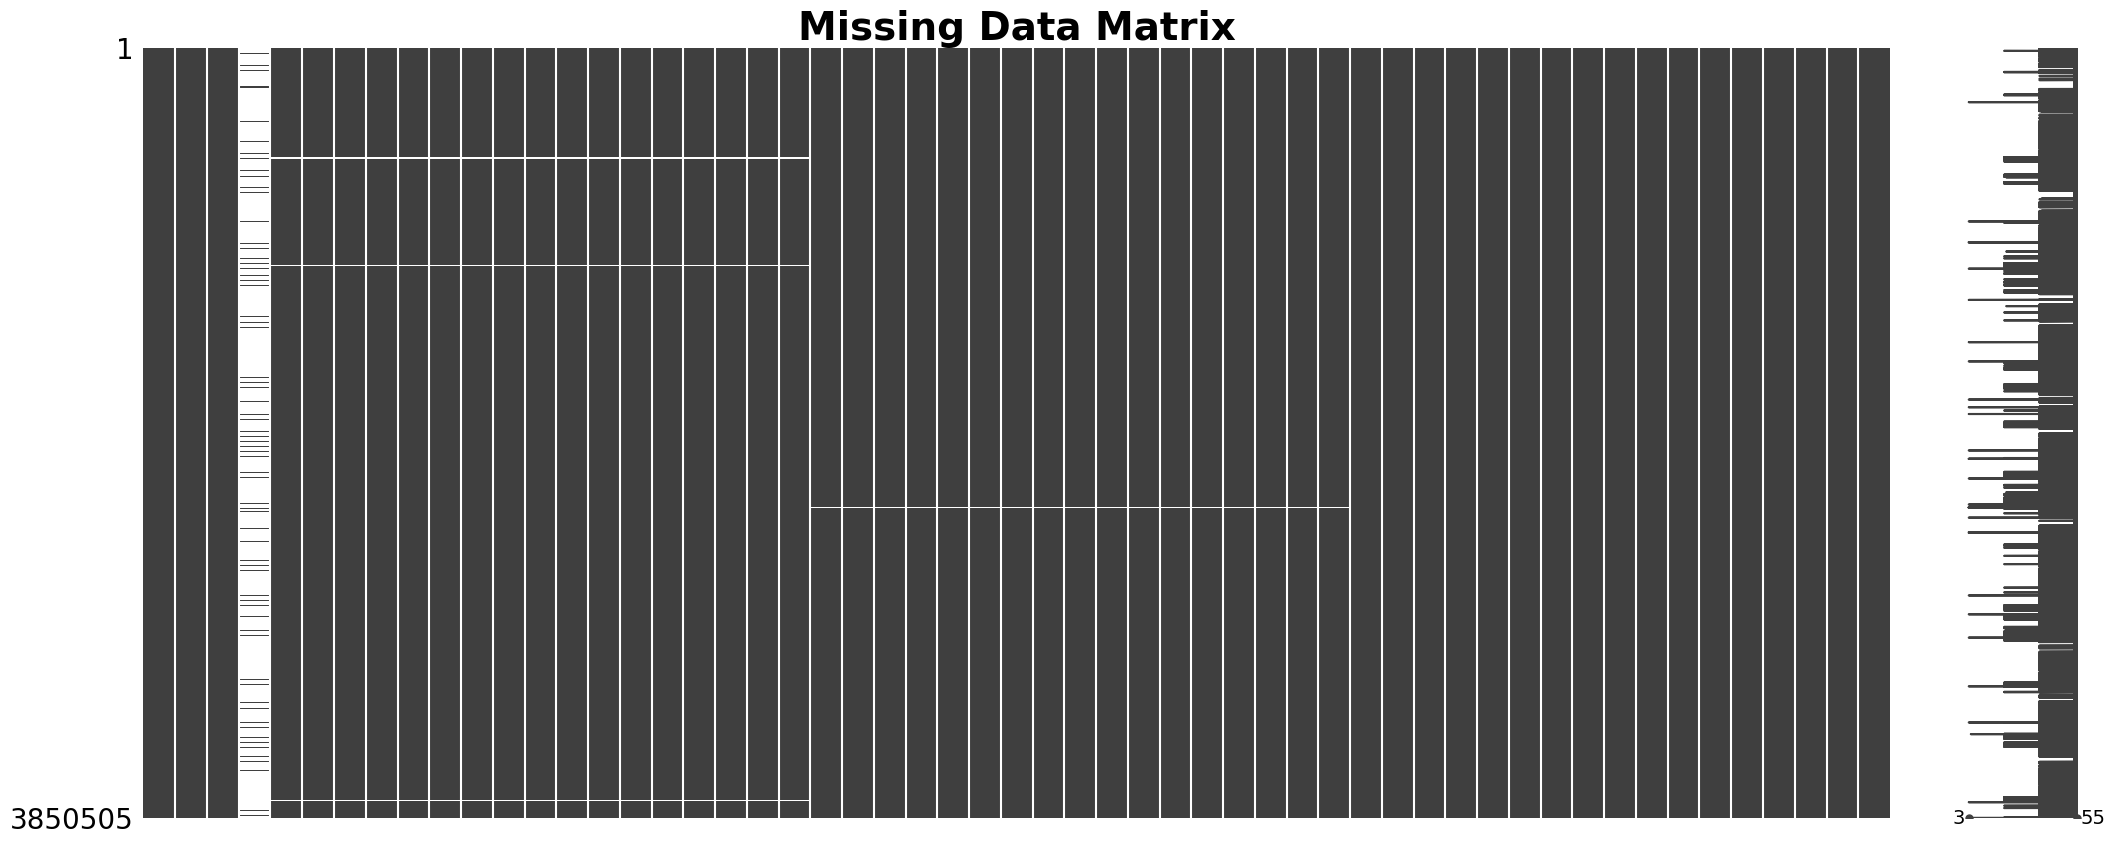

In [11]:
plt.figure(figsize=(10, 6))
msno.matrix(data)
plt.title(f'Missing Data Matrix',
          fontsize=28,
          fontweight='bold'
          )
plt.show()

In [12]:
data.isna().sum().sort_values()

,0
subject,0
timestamp,0
activityID,0
chest_acc_z6,4310
chest_gyro_x,4310
chest_mag_x,4310
chest_gyro_y,4310
chest_gyro_z,4310
chest_acc_z16,4310
chest_acc_x6,4310


/tmp/ipython-input-515607112.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(sorted_by_keys.keys(), rotation=45)


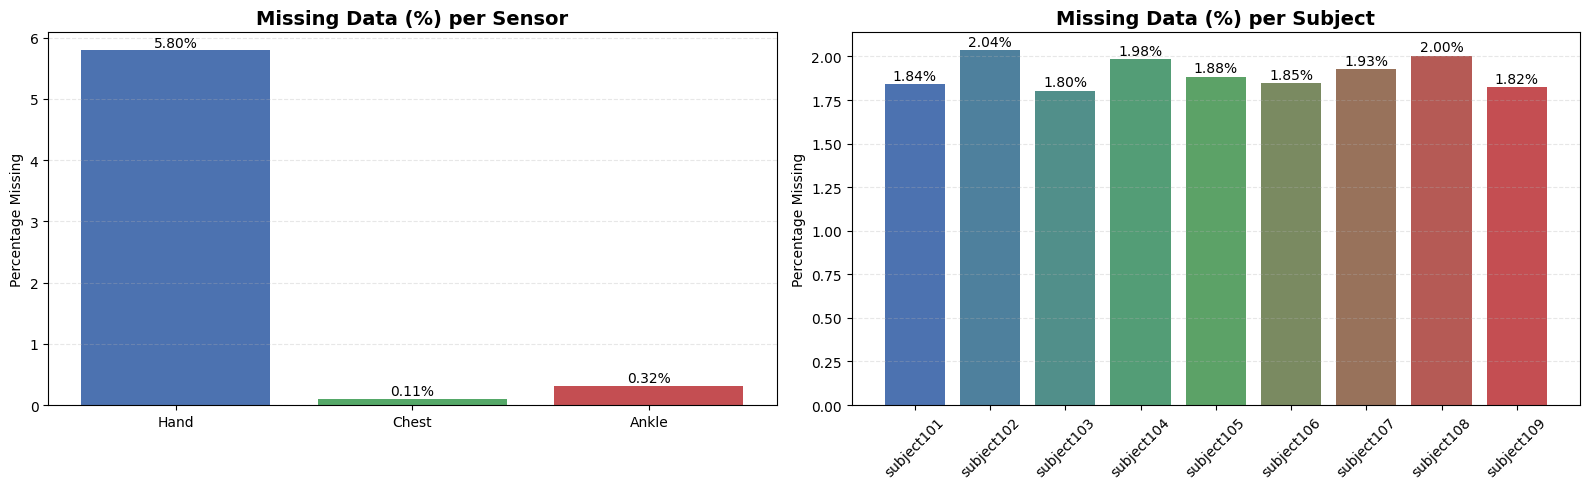

In [13]:
colors_3 = ["#4C72B0", "#55A868", "#C44E52"]
cmap = LinearSegmentedColormap.from_list("custom", colors_3, N=16)
colors_9 = [cmap(i) for i in np.linspace(0, 1, 9)]


hand_cols  = df.columns[3:20]
chest_cols = df.columns[20:37]
ankle_cols = df.columns[37:54]

missing_per_sensor = {
    "Hand":  df[hand_cols].isna().mean().mean() * 100,
    "Chest": df[chest_cols].isna().mean().mean() * 100,
    "Ankle": df[ankle_cols].isna().mean().mean() * 100
}

missing_per_subject = {subj: data[data['subject'] == subj].isna().mean().mean()*100
                       for subj in data['subject'].unique()}
sorted_by_keys = dict(sorted(missing_per_subject.items(), key=lambda x: x[0]))


fig, axes = plt.subplots(1, 2, figsize=(16,5))


bars1 = axes[0].bar(missing_per_sensor.keys(), missing_per_sensor.values(), color=colors_3)
axes[0].set_title("Missing Data (%) per Sensor", fontweight='bold', fontsize=14)
axes[0].set_ylabel("Percentage Missing")
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.008, f"{height:.2f}%",
                 ha='center', va='bottom', fontsize=10)


bars2 = axes[1].bar(sorted_by_keys.keys(), sorted_by_keys.values(), color=colors_9)
axes[1].set_title("Missing Data (%) per Subject", fontweight='bold', fontsize=14)
axes[1].set_ylabel("Percentage Missing")
axes[1].set_xticklabels(sorted_by_keys.keys(), rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.008, f"{height:.2f}%",
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [14]:
hand_cols = ["hand_temp",
            "hand_acc_x16", "hand_acc_y16", "hand_acc_z16",
            "hand_acc_x6",  "hand_acc_y6",  "hand_acc_z6",
            "hand_gyro_x",  "hand_gyro_y",  "hand_gyro_z",
            "hand_mag_x",   "hand_mag_y",   "hand_mag_z",
            "hand_orient_w", "hand_orient_x", "hand_orient_y", "hand_orient_z"]

chest_cols = ["chest_temp",
              "chest_acc_x16", "chest_acc_y16", "chest_acc_z16",
              "chest_acc_x6",  "chest_acc_y6",  "chest_acc_z6",
              "chest_gyro_x",  "chest_gyro_y",  "chest_gyro_z",
              "chest_mag_x",   "chest_mag_y",   "chest_mag_z",
              "chest_orient_w", "chest_orient_x", "chest_orient_y", "chest_orient_z"]

ankle_cols = ["ankle_temp",
              "ankle_acc_x16", "ankle_acc_y16", "ankle_acc_z16",
              "ankle_acc_x6",  "ankle_acc_y6",  "ankle_acc_z6",
              "ankle_gyro_x",  "ankle_gyro_y",  "ankle_gyro_z",
              "ankle_mag_x",   "ankle_mag_y",   "ankle_mag_z",
              "ankle_orient_w", "ankle_orient_x", "ankle_orient_y", "ankle_orient_z"]


grouped = data.groupby(['subject', 'activityID'])

cleaned_dfs = []

for (subj, act), df_group in grouped:

    imu_cols = hand_cols + chest_cols + ankle_cols
    df_group[imu_cols] = df_group[imu_cols].interpolate(method='linear')

    df_group['heart_rate'] = df_group['heart_rate'].interpolate(method='linear')

    cleaned_dfs.append(df_group)


cleaned_data = pd.concat(cleaned_dfs, ignore_index=True)


/tmp/ipython-input-3548659898.py:36: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  df_group['heart_rate_med'] = medfilt(df_group['heart_rate'], kernel_size=5)


In [24]:
cleaned_data[['heart_rate','heart_rate_med']].loc[1500:1600, :].head(50)

,heart_rate,heart_rate_med
1500,107.0,107.0
1501,107.0,107.0
1502,107.0,107.0
1503,107.0,107.0
1504,107.0,107.0
1505,107.0,107.0
1506,107.0,107.0
1507,107.0,107.0
1508,107.0,107.0
1509,107.0,107.0


In [20]:
cleaned_data.isna().sum()

,0
subject,0
timestamp,0
activityID,0
heart_rate,594
hand_temp,24
hand_acc_x16,24
hand_acc_y16,24
hand_acc_z16,24
hand_acc_x6,24
hand_acc_y6,24


In [31]:

subset = cleaned_data.loc[(cleaned_data["subject"]=='subject101') &
                  (cleaned_data["activityID"]==13),
                  ["timestamp", "heart_rate"]]

import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=subset["timestamp"],
        y=subset["heart_rate"],
        line=dict(color="#C44E52", width=2),
        marker=dict(size=4, color="#4C72B0")
    )
)

fig.update_layout(
    title="Heart Rate Over Time (Subject 101 — Activity 13)",
    xaxis_title="Time (s)",
    yaxis_title="Heart Rate (BPM)",
    template="plotly_white",
    height=500,
)

fig.show()